In [102]:
#1.linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Veriyi okuma
df = pd.read_csv('veri.csv')

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
df['Marka'] = le.fit_transform(df['Marka'])
df['Model'] = le.fit_transform(df['Model'])

# Özellikler ve hedef değişkeni ayırma
X = df[['Marka', 'Model', 'Depolama', 'RAM', 'Yaş']]
y = df['Fiyat']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')


R2 Score: 0.8312
RMSE: 2477.37


In [104]:
#2.desicion tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
import numpy as np

# Veriyi okuma
df = pd.read_csv('veri.csv')

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
df['Marka'] = le.fit_transform(df['Marka'])
df['Model'] = le.fit_transform(df['Model'])


# Özellikler ve hedef değişkeni ayırma
X = df[['Marka', 'Model', 'Depolama', 'RAM', 'Yaş']]
y = df['Fiyat']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini oluşturma ve eğitme
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = dt_model.predict(X_test)

# Model performansını değerlendirme
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')



R2 Score: 0.9020
RMSE: 1888.04


In [105]:
#3.logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Veriyi okuma
df = pd.read_csv('veri.csv')

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
df['Marka'] = le.fit_transform(df['Marka'])
df['Model'] = le.fit_transform(df['Model'])

# Özellikler ve hedef değişkeni ayırma
X = df[['Marka', 'Model', 'Depolama', 'RAM', 'Yaş']]
y = df['Fiyat']

# Fiyatları kategorilere ayırma (örnek: düşük, orta, yüksek)
y_binned = pd.qcut(y, q=3, labels=['Düşük', 'Orta', 'Yüksek'])

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturma ve eğitme
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = log_model.predict(X_test)

# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f'Doğruluk Oranı: {accuracy:.4f}')
print('\nSınıflandırma Raporu:')
print(classification_report(y_test, y_pred))


Doğruluk Oranı: 0.7670

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Düşük       0.78      0.77      0.78       329
        Orta       0.65      0.64      0.65       332
      Yüksek       0.86      0.88      0.87       339

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



In [106]:
#4.polinomial regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Veriyi okuma
df = pd.read_csv('veri.csv')

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
df['Marka'] = le.fit_transform(df['Marka'])
df['Model'] = le.fit_transform(df['Model'])


# Özellikler ve hedef değişkeni ayırma
X = df[['Marka', 'Model', 'Depolama', 'RAM', 'Yaş']]
y = df['Fiyat']

# Polynomial özellikler oluşturma (derece=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = poly_model.predict(X_test)

# Model performansını değerlendirme
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')

# Örnek tahmin
print('\nÖrnek Tahmin:')
ornek_veri = X.iloc[0:1]  # İlk satırı alalım
ornek_veri_poly = poly.transform(ornek_veri)
tahmin = poly_model.predict(ornek_veri_poly)
print(f'Gerçek Değer: {y.iloc[0]:.2f}')
print(f'Tahmin Edilen Değer: {tahmin[0]:.2f}')


R2 Score: 0.8832
RMSE: 2060.50

Örnek Tahmin:
Gerçek Değer: 14085.50
Tahmin Edilen Değer: 12441.54


In [107]:
#5.ridge regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Veriyi okuma
df = pd.read_csv('veri.csv')

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
df['Marka'] = le.fit_transform(df['Marka'])
df['Model'] = le.fit_transform(df['Model'])

# Özellikler ve hedef değişkeni ayırma
X = df[['Marka', 'Model', 'Depolama', 'RAM', 'Yaş']]
y = df['Fiyat']

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge model oluşturma ve eğitme (alpha=1.0 regularizasyon parametresi)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = ridge_model.predict(X_test)

# Model performansını değerlendirme
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')
print('\nÖzellik Katsayıları:')
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f'{feature}: {coef:.2f}')

# Farklı alpha değerleri ile deneme
alphas = [0.1, 1.0, 10.0, 100.0]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f'\nAlpha = {alpha}')
    print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')


R2 Score: 0.8312
RMSE: 2477.28

Özellik Katsayıları:
Marka: -1114.16
Model: 177.47
Depolama: 5091.04
RAM: 376.79
Yaş: -1778.63

Alpha = 0.1
R2 Score: 0.8312

Alpha = 1.0
R2 Score: 0.8312

Alpha = 10.0
R2 Score: 0.8313

Alpha = 100.0
R2 Score: 0.8319


R-kare: 0.9253
RMSE: 1648.05
MAE: 1343.46
MAPE: 7.89%
Çapraz Doğrulama R-kare Ortalama: 0.9306
Çapraz Doğrulama R-kare Standart Sapma: 0.0020
Marka: 0.0623
Model: 0.0886
Depolama: 0.7483
RAM: 0.0094
Yaş: 0.0913


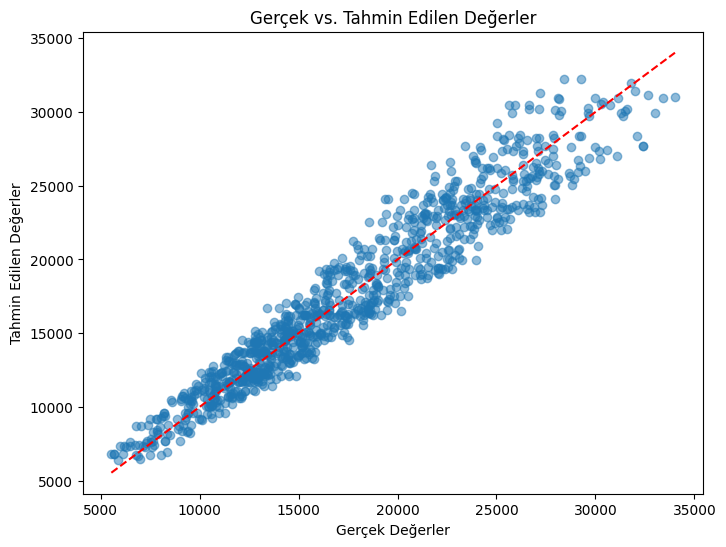

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from joblib import dump

# Veri yükleme
df = pd.read_csv("veri.csv")

# Kategorik özellikleri sayısallaştırma
label_encoders = {}
for column in ['Marka', 'Model']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Label encoder'ları sakla

# Özellikler ve hedef değişken
X = df.drop('Fiyat', axis=1)
y = df['Fiyat']

# Veri ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest modeli ve hiperparametre optimizasyonu
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Tahminler
y_pred = best_rf_model.predict(X_test)

# Metrikler
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


print(f"R-kare: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Çapraz doğrulama
cv_scores = cross_val_score(best_rf_model, X_scaled, y, cv=5, scoring='r2')
print(f"Çapraz Doğrulama R-kare Ortalama: {cv_scores.mean():.4f}")
print(f"Çapraz Doğrulama R-kare Standart Sapma: {cv_scores.std():.4f}")

# Özellik önemleri
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")


# Tahmin vs. Gerçek Değerler grafiği
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs. Tahmin Edilen Değerler")
plt.show()



In [109]:
#7.knn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Veriyi okuma
df = pd.read_csv('veri.csv')

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
df['Marka'] = le.fit_transform(df['Marka'])
df['Model'] = le.fit_transform(df['Model'])


# Özellikler ve hedef değişkeni ayırma
X = df[['Marka', 'Model', 'Depolama', 'RAM', 'Yaş']]
y = df['Fiyat']

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN modelini oluşturma ve eğitme
knn_model = KNeighborsRegressor(n_neighbors=11, weights='uniform')
knn_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = knn_model.predict(X_test)

# Model performansını değerlendirme
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')

# Farklı k değerleri ile deneme
k_values = [3, 5, 7, 9, 11]
print('\nFarklı k değerleri için sonuçlar:')
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f'k={k}, R2 Score: {r2_score(y_test, y_pred):.4f}')



R2 Score: 0.9225
RMSE: 1678.29

Farklı k değerleri için sonuçlar:
k=3, R2 Score: 0.9066
k=5, R2 Score: 0.9169
k=7, R2 Score: 0.9234
k=9, R2 Score: 0.9232
k=11, R2 Score: 0.9225


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from joblib import dump
import numpy as np
# Veriyi okuma
df = pd.read_csv('veri.csv')

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
df['Marka'] = le.fit_transform(df['Marka'])
df['Model'] = le.fit_transform(df['Model'])


# Özellikler ve hedef değişkeni ayırma
X = df[['Marka', 'Model', 'Depolama', 'RAM', 'Yaş']]
y = df['Fiyat']

# Feature Engineering
X['RAM_Depolama_Ratio'] = X['RAM'] / X['Depolama']
X['Yaş_Kare'] = X['Yaş'] ** 2

# Aykırı değerleri tespit et ve işle
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (y > lower_bound) & (y < upper_bound)

# Eksik değerleri kontrol et ve doldur
X = X.fillna(X.mean())

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Grid Search için parametre grid'i
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# En iyi parametrelerle modeli oluşturma
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

# Final model
final_model = GradientBoostingRegressor(
    **best_params,
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    tol=1e-4
)
final_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = final_model.predict(X_test)

# Model performansını değerlendirme
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'\nModel Performansı:')
print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')

# Çapraz doğrulama skorları
cv_scores = cross_val_score(final_model, X_scaled, y, cv=5, scoring='r2')
print(f'\nÇapraz Doğrulama Sonuçları:')
print(f'Ortalama R2: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')

# Özellik önem derecelerini gösterme
print('\nÖzellik Önem Dereceleri:')
feature_importance = dict(zip(X.columns, final_model.feature_importances_))
sorted_features = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))
for feature, importance in sorted_features.items():
    print(f'{feature}: {importance:.4f}')

dump(final_model, 'eniyi.joblib')

En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Model Performansı:
R2 Score: 0.9316
RMSE: 1577.45

Çapraz Doğrulama Sonuçları:
Ortalama R2: 0.9354 (+/- 0.0051)

Özellik Önem Dereceleri:
Depolama: 0.7579
Marka: 0.0745
Model: 0.0737
Yaş: 0.0493
Yaş_Kare: 0.0389
RAM: 0.0047
RAM_Depolama_Ratio: 0.0009


['eniyi.joblib']

In [100]:
#9.support vector machine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Veriyi okuma
df = pd.read_csv('veri.csv')

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
df['Marka'] = le.fit_transform(df['Marka'])
df['Model'] = le.fit_transform(df['Model'])


# Özellikler ve hedef değişkeni ayırma
X = df[['Marka', 'Model', 'Depolama', 'RAM', 'Yaş']]
y = df['Fiyat']

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Farklı kernel'lar ile SVM modelleri oluşturma ve karşılaştırma
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    # SVM modelini oluşturma ve eğitme
    svm_model = SVR(kernel=kernel)
    svm_model.fit(X_train, y_train)
    
    # Tahmin yapma
    y_pred = svm_model.predict(X_test)
    
    # Model performansını değerlendirme
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f'\nKernel: {kernel}')
    print(f'R2 Score: {r2:.4f}')
    print(f'RMSE: {rmse:.2f}')

# En iyi kernel (RBF) ile detaylı model
best_svm = SVR(
    kernel='rbf',
    C=1.0,
    epsilon=0.1,
    gamma='scale'
)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

print('\nEn İyi Model (RBF Kernel):')
print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')



Kernel: linear
R2 Score: 0.5723
RMSE: 3911.18

Kernel: rbf
R2 Score: 0.0450
RMSE: 5844.47

Kernel: poly
R2 Score: 0.0865
RMSE: 5716.13

En İyi Model (RBF Kernel):
R2 Score: 0.0450
RMSE: 5844.47


En iyi parametreler: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}

Model Performansı:
R2 Score: 0.8836
Adjusted R2: 0.8828
RMSE: 2040.49
MAE: 1393.76
MAPE: 8.67%

Çapraz Doğrulama Sonuçları:
Ortalama R2: 0.8912 (+/- 0.1601)

Özellik Önem Dereceleri:
Depolama: 0.7133
RAM_Depolama_Ratio: 0.1080
Yaş: 0.0513
Marka: 0.0465
Yaş_Kare: 0.0352
RAM: 0.0236
Model: 0.0220


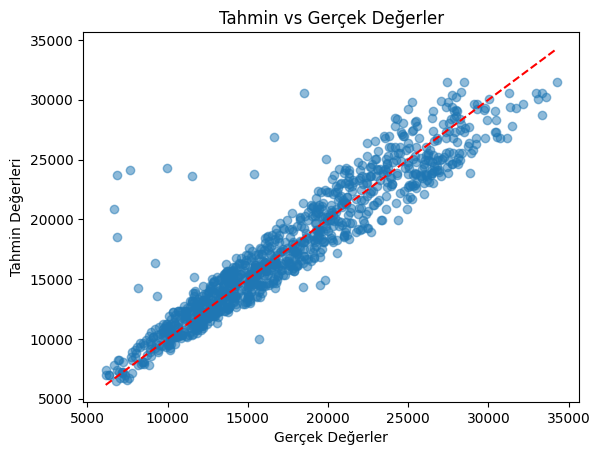

In [101]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt

# Veriyi okuma
df = pd.read_csv('veri.csv')

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
df['Marka'] = le.fit_transform(df['Marka'])
df['Model'] = le.fit_transform(df['Model'])

# Özellikler ve hedef değişkeni ayırma
X = df[['Marka', 'Model', 'Depolama', 'RAM', 'Yaş']]
y = df['Fiyat']

# Feature Engineering
X['RAM_Depolama_Ratio'] = X['RAM'] / X['Depolama']
X['Yaş_Kare'] = X['Yaş'] ** 2

# Eksik değerleri doldurma
X = X.fillna(X.mean())

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBoost için parametre grid'i
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV ile en iyi parametreleri bulma
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# En iyi parametreler
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

# Final XGBoost modelini oluşturma
final_xgb = xgb.XGBRegressor(**best_params, random_state=42, objective='reg:squarederror')
final_xgb.fit(X_train, y_train)

# Tahmin yapma
y_pred = final_xgb.predict(X_test)

# Performans değerlendirmesi
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f'\nModel Performansı:')
print(f'R2 Score: {r2:.4f}')
print(f'Adjusted R2: {adj_r2:.4f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')

# Çapraz doğrulama
cv_scores = cross_val_score(final_xgb, X_scaled, y, cv=5, scoring='r2')
print(f'\nÇapraz Doğrulama Sonuçları:')
print(f'Ortalama R2: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')

# Özellik önem dereceleri
print('\nÖzellik Önem Dereceleri:')
feature_importance = dict(zip(X.columns, final_xgb.feature_importances_))
sorted_features = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))
for feature, importance in sorted_features.items():
    print(f'{feature}: {importance:.4f}')

# Tahmin vs Gerçek karşılaştırması
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Tahmin vs Gerçek Değerler')
plt.show()

